## Week 5, Lab 2: Tackling an NLP Problem with Naive Bayes
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we are going to apply a **new** modeling technique to natural language processing data.

> "But how can we apply a modeling technique we haven't learned?!"

The DSI program is great - but we can't teach you *everything* about data science in 12 weeks! This lab is designed to help you start learning something new without it being taught in a formal lesson. 
- Later in the cohort (like for your capstone!), you'll be exploring models, libraries, and resources that you haven't been explicitly taught.
- After the program, you'll want to continue developing your skills. Being comfortable with documentation and being confident in your ability to read something new and decide whether or not it is an appropriate method for the problem you're trying to solve is **incredibly** valuable.

## Step 1: Define the problem.

Many organizations have a substantial interest in classifying users of their product into groups. Some examples:
- A company that serves as a marketplace may want to predict who is likely to purchase a certain type of product on their platform, like books, cars, or food.
- An application developer may want to identify which individuals are willing to pay money for "bonus features" or to upgrade their app.
- A social media organization may want to identify who generates the highest rate of content that later goes "viral."

### Summary
In this lab, you're an engineer for Facebook. In recent years, the organization Cambridge Analytica gained worldwide notoriety for its use of Facebook data in an attempt to sway electoral outcomes.

Cambridge Analytica, an organization staffed with lots of Ph.D. researchers, used the Big5 personality groupings (also called OCEAN) to group people into one of 32 different groups.
- The five qualities measured by this personality assessment are:
    - **O**penness
    - **C**onscientiousness
    - **E**xtroversion
    - **A**greeableness
    - **N**euroticism
- Each person could be classified as "Yes" or "No" for each of the five qualities.
- This makes for 32 different potential combinations of qualities. ($2^5 = 32$)
- You don't have to check it out, but if you want to learn more about this personality assessment, head to [the Wikipedia page](https://en.wikipedia.org/wiki/Big_Five_personality_traits).
- There's also [a short (3-4 pages) academic paper describing part of this approach](./celli-al_wcpr13.pdf).

Cambridge Analytica's methodology was, roughly, the following:
- Gather a large amount of data from Facebook.
- Use this data to predict an individual's Big5 personality "grouping."
- Design political advertisements that would be particularly effective to that particular "grouping." (For example, are certain advertisements particularly effective toward people with specific personality traits?)

You want to know the **real-world problem**: "Is what Cambridge Analytica attempted to do actually possible, or is it junk science?"

However, we'll solve the related **data science problem**: "Are one's Facebook statuses predictive of whether or not one is agreeable?"
> Note: If Facebook statuses aren't predictive of one being agreeable (one of the OCEAN qualities), then Cambridge Analytica's approach won't work very well!

## Step 2: Obtain the data.

Obviously, there are plenty of opportunities to discuss the ethics surrounding this particular issue... so let's do that.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('./mypersonality_final.csv', encoding = 'ISO-8859-1')

In [3]:
data.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/19/09 03:21 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/02/09 08:41 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/15/09 01:15 PM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,06/22/09 04:48 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y,07/20/09 02:31 AM,180.0,14861.6,93.29,0.03,15661.0,0.49,0.1


### 1. What is the difference between anonymity and confidentiality? All else held equal, which tends to keep people safer?

Anonymity keeps the subject's secret while confidentiality hints the subject's secret and a link to them is possible. Confidentiality keep people safer because the identity and secret of the subject is not revealed or hinted.

### 2. Suppose that the "unique identifier" in the above data, the `#AUTHID`, is a randomly generated key so that it can never be connected back to the original poster. Have we guaranteed anonymity here? Why or why not?

Despite the AUTHID being a randomly generated key , there is no guarantee of anonymity because there is often a leak often exploited through ip address, hand writing recognition, location of surveys taken, natural language pattern, etc.

### 3. As an engineer for Facebook, you recognize that user data will be used by Facebook and by other organizations - that won't change. However, what are at least three recommendations you would bring to your manager to improve how data is used and shared? Be as specific as you can.

1. Give verbal and written warnings that data used will be for analytics purposes only and that any hacking attempts will be thwarted and addressed. 
2. Watermark data to trace who hacked the database.
3. Rotate employees in charge of database to keep the subjects secret.

## Step 3: Explore the data.

- Note: For our $X$ variable, we will only use the `STATUS` variable. For our $Y$ variable, we will only use the `cAGR` variable.

### 4. Explore the data here.
> We aren't explicitly asking you to do specific EDA here, but what EDA would you generally do with this data? Do the EDA you usually would, especially if you know what the goal of this analysis is.

In [4]:
data.isnull().sum()

#AUTHID         0
STATUS          0
sEXT            0
sNEU            0
sAGR            0
sCON            0
sOPN            0
cEXT            0
cNEU            0
cAGR            0
cCON            0
cOPN            0
DATE            0
NETWORKSIZE     0
BETWEENNESS     0
NBETWEENNESS    0
DENSITY         0
BROKERAGE       0
NBROKERAGE      0
TRANSITIVITY    1
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.shape

(9916, 20)

In [7]:
y=data['cAGR']

In [8]:
y=y.map(lambda x:1 if x=='y' else 0)

(array([4649.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5267.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

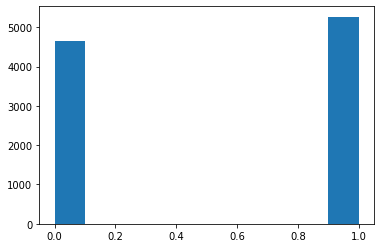

In [9]:
plt.hist(y)

In [10]:
X = data['STATUS']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [12]:
cvec = CountVectorizer()

In [13]:
cvec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [14]:
cvec.transform(X_train)

<7437x13167 sparse matrix of type '<class 'numpy.int64'>'
	with 93300 stored elements in Compressed Sparse Row format>

In [15]:
X_train_cv = cvec.transform(X_train)

In [16]:
X_test_cv = cvec.transform(X_test)

In [17]:
X_train_cv.shape

(7437, 13167)

In [18]:
type(X_train_cv)

scipy.sparse.csr.csr_matrix

In [19]:
X_train_cv[0,:]

<1x13167 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [20]:
words = pd.DataFrame(
    X_train_cv.todense(),
    columns = cvec.get_feature_names()
)

In [21]:
words.head()

,00,000,000ft,00am,00pm,02pm,0330,05,0723,0766bc7f,...,échangé,école,équipe,étais,était,étant,état,être,últimas,últimos
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
words.sum().sort_values(ascending=False).head(20)

the         3724
to          3355
is          2374
and         2275
of          1586
in          1519
it          1244
for         1218
my          1161
you         1124
propname    1014
that         863
on           793
with         744
be           675
me           609
at           591
just         554
this         554
have         549
dtype: int64

In [23]:
i = 69
data.iloc[i,:]['STATUS']

'has a fair idea of how to manage the 2.5 kids cliche... She just needs a very strong gentleman named *PROPNAME* and thriteen wet napkins.'

### 5. What is the difference between CountVectorizer and TFIDFVectorizer?

CountVectorizer creates a vector (column) for each token and counts up the number of occurences of each token in each document while TFIDFVectorizer also factors in words that important to one document,  relative to all other documents.

### 6. What are stopwords?

Common uninformative words to the audience

### 7. Give an example of when you might remove stopwords.

Documents or corpus that include words such as I, of, and to. 

### 8. Give an example of when you might keep stopwords in your model.

When the words include such words as "not" that gives inverse meaning

## Step 4: Model the data.

We are going to fit two types of models: a logistic regression and [a Naive Bayes classifier](https://scikit-learn.org/stable/modules/naive_bayes.html).

**Reminder:** We will only use the feature `STATUS` to model `cAGR`.

### We want to attempt to fit our models on sixteen sets of features:

1. CountVectorizer with 100 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
2. CountVectorizer with 100 features, with English stopwords removed and with the default `ngram_range`.
3. CountVectorizer with 100 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
4. CountVectorizer with 100 features, with English stopwords kept in and with the default `ngram_range`.
5. CountVectorizer with 500 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
6. CountVectorizer with 500 features, with English stopwords removed and with the default `ngram_range`.
7. CountVectorizer with 500 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
8. CountVectorizer with 500 features, with English stopwords kept in and with the default `ngram_range`.
9. TFIDFVectorizer with 100 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
10. TFIDFVectorizer with 100 features, with English stopwords removed and with the default `ngram_range`.
11. TFIDFVectorizer with 100 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
12. TFIDFVectorizer with 100 features, with English stopwords kept in and with the default `ngram_range`.
13. TFIDFVectorizer with 500 features, with English stopwords removed and with an `ngram_range` that includes 1 and 2.
14. TFIDFVectorizer with 500 features, with English stopwords removed and with the default `ngram_range`.
15. TFIDFVectorizer with 500 features, with English stopwords kept in and with an `ngram_range` that includes 1 and 2.
16. TFIDFVectorizer with 500 features, with English stopwords kept in and with the default `ngram_range`.

### 9. Rather than manually instantiating 16 different vectorizers, what `sklearn` class have we learned about that might make this easier? Use it.

In [24]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pipe_cv = Pipeline([
    ('cv',CountVectorizer()),
    ('lr',LogisticRegression())
])

In [26]:
CountVectorizer(max_features=1,ngram_range=1,stop_words=1);

In [27]:
params_grid = {
    'cv__stop_words': [None,'english'],
    'cv__ngram_range': [(1,2),(1,1)],
    'cv__max_features': [100,500],
}

In [28]:
gs_cv = GridSearchCV(pipe_cv,
                     params_grid)

In [29]:
gs_cv.fit(X_train,y_train)

/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tringuyen/opt/anaconda3/lib/python3.7/site-packages/sklear

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cv',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                         

In [30]:
gs_cv.score(X_train,y_train)

0.6142261664649724

In [31]:
gs_cv.score(X_test,y_test)

0.553852359822509

In [32]:
y.value_counts(normalize=True)

1    0.531162
0    0.468838
Name: cAGR, dtype: float64

### 10. What are some of the advantages of fitting a logistic regression model?

Some advantages of fitting a logistic regression model include:
1. Target is a discrete (binary or ordinal) variable
2. Input variables have any measurement level
3. Predicted values are the probability of a particular levels of the target variable at the given values of the input variables.

source:https://medium.com/greyatom/logistic-regression-89e496433063

### 11. Fit a logistic regression model and compare it to the baseline.

In [33]:
lr = LogisticRegression()

lr.fit(X_train_cv,y_train)

print(f'Training Score: {lr.score(X_train_cv,y_train)}')
print(f'Testing Score: {lr.score(X_test_cv,y_test)}')

Training Score: 0.9105822240150598
Testing Score: 0.5921742638160549


The training score is higher than the testing score hinting an overfit.

### Summary of Naive Bayes 

Naive Bayes is a classification technique that relies on probability to classify observations.
- It's based on a probability rule called **Bayes' Theorem**... thus, "**Bayes**."
- It makes an assumption that isn't often met, so it's "**naive**."

Despite being a model that relies on a naive assumption, it often performs pretty well! (This is kind of like linear regression... we aren't always guaranteed homoscedastic errors in linear regression, but the model might still do a good job regardless.)
- [Interested in details? Read more here if you want.](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)


The [sklearn documentation](https://scikit-learn.org/stable/modules/naive_bayes.html) is here, but it can be intimidating. So, to quickly summarize the Bayes and Naive parts of the model...

#### Bayes' Theorem
If you've seen Bayes' Theorem, it relates the probability of $P(A|B)$ to $P(B|A)$. (Don't worry; we won't be doing any probability calculations by hand! However, you may want to refresh your memory on conditional probability from our earlier lessons if you forget what a conditional probability is.)

$$
\begin{eqnarray*}
\text{Bayes' Theorem: } P(A|B) &=& \frac{P(B|A)P(A)}{P(B)}
\end{eqnarray*}
$$

- Let $A$ be that someone is "agreeable," like the OCEAN category.
- Let $B$ represent the words used in their Facebook post.

$$
\begin{eqnarray*}
\text{Bayes' Theorem: } P(A|B) &=& \frac{P(B|A)P(A)}{P(B)} \\
\Rightarrow P(\text{person is agreeable}|\text{words in Facebook post}) &=& \frac{P(\text{words in Facebook post}|\text{person is agreeable})P(\text{person is agreeable})}{P(\text{words in Facebook post})}
\end{eqnarray*}
$$

We want to calculate the probability that someone is agreeable **given** the words that they used in their Facebook post! (Rather than calculating this probability by hand, this is done under the hood and we can just see the results by checking `.predict_proba()`.) However, this is exactly what our model is doing. We can (a.k.a. the model can) calculate the pieces on the right-hand side of the equation to give us a probability estimate of how likely someone is to be agreeable given their Facebook post.

#### Naive Assumption

If our goal is to estimate $P(\text{person is agreeable}|\text{words in Facebook post})$, that can be quite tricky.

---

<details><summary>Bonus: if you want to understand why that's complicated, click here.</summary>
    
- The event $\text{"words in Facebook post"}$ is a complicated event to calculate.

- If a Facebook post has 100 words in it, then the event $\text{"words in Facebook post"} = \text{"word 1 is in the Facebook post" and "word 2 is in the Facebook post" and }\ldots \text{ and "word 100 is in the Facebook post"}$.

- To calculate the joint probability of all 100 words being in the Facebook post gets complicated pretty quickly. (Refer back to the probability notes on how to calculate the joint probability of two events if you want to see more.)
</details>

---

To simplify matters, we make an assumption: **we assume that all of our features are independent of one another.**

In some contexts, this assumption might be realistic!

### 12. Why would this assumption not be realistic with NLP data?

NLP data may contain features that are dependent of one another making this assumption unrealistic.

Despite this assumption not being realistic with NLP data, we still use Naive Bayes pretty frequently.
- It's a very fast modeling algorithm. (which is great especially when we have lots of features and/or lots of data!)
- It is often an excellent classifier, outperforming more complicated models.

There are three common types of Naive Bayes models: Bernoulli Naive Bayes, Multinomial Naive Bayes, and Gaussian Naive Bayes.
- How do we pick which of the three models to use? It depends on our $X$ variable.
    - Bernoulli Naive Bayes is appropriate when our features are all 0/1 variables.
        - [Bernoulli NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB)
    - Multinomial Naive Bayes is appropriate when our features are variables that take on only positive integer counts.
        - [Multinomial NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB)
    - Gaussian Naive Bayes is appropriate when our features are Normally distributed variables. (Realistically, though, we kind of use Gaussian whenever neither Bernoulli nor Multinomial works.)
        - [Gaussian NB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

### 13. Suppose you CountVectorized your features. Which Naive Bayes model would be most appropriate to fit? Why? Fit it.

Multinomial NB works for CountVectorized features because multinomial works with occurance counts and CountVectorizer counts up the occurances in this case, words in facebook posts.

In [34]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

mnb = MultinomialNB()

In [35]:
mnb.fit(X_train_cv,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
mnb.score(X_train_cv,y_train)

0.862982385370445

In [37]:
mnb.score(X_test_cv,y_test)

0.6018555869302138

### 14. Suppose you TFIDFVectorized your features. Which Naive Bayes model would be most appropriate to fit? Why? Fit it.

Gaussian NB model works for TFIDFVectorized features because gaussian can perform partial fits similar to TFIDFVectorizer factoring in important words in one document, relative to all other documents.

In [38]:
tvec = TfidfVectorizer()

In [39]:
tvec.fit(X_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [45]:
X_train_tvec = tvec.transform(X_train).toarray()

X_test_tvec =  tvec.transform(X_test).toarray()

In [46]:
# Instantiate logistic regression.
lr = LogisticRegression()

# Fit logistic regression.
lr.fit(X_train_tvec, y_train)

# Evaluate logistic regression.
print(f'Training Score: {lr.score(X_train_tvec, y_train)}')
print(f'Testing Score: {lr.score(X_test_tvec, y_test)}')

Training Score: 0.8389135404060777
Testing Score: 0.5966115369100444


In [47]:
gnb = GaussianNB()

In [48]:
gnb.fit(X_train_tvec,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [51]:
gnb.score(X_train_tvec,y_train)

0.8717224687373941

In [52]:
gnb.score(X_test_tvec,y_test)

0.5744251714400969

### 15. Compare the performance of your models.

In [59]:
print(f'MNB Score: {mnb.score(X_train_cv,y_train)}')
print(f'MNB Score: {mnb.score(X_test_cv,y_test)}')

MNB Score: 0.862982385370445
MNB Score: 0.6018555869302138


In [60]:
print(f'GNB Score: {gnb.score(X_train_tvec,y_train)}')
print(f'GNB Score: {gnb.score(X_test_tvec,y_test)}')

GNB Score: 0.8717224687373941
GNB Score: 0.5744251714400969


Even though the GNB train score is higher than the MNB train score, and the GNB test score is lower than the MNB test score, the comparison is not fair. Both are using different models with different vectorizer methods.

### 16. Even though we didn't explore the full extent of Cambridge Analytica's modeling, based on what we did here, how effective was their approach at using Facebook data to model agreeableness?

Based on the training scores being higher than the testing scores, it seems to overfitting the model indicating the models may only be accurate for data set but may cause issues for future data sets.